In [33]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles

# The Particles class

We could use it to handle the particle information.

The class contains several properties, including tag, mass, position, velocity, acceleration, and time.

For our own convenience, we want to the below data type to handle the N-body simulation:

In [34]:
time          = 0    # the starting  time
num_particles = 100  # number of particles
masses        = np.ones((num_particles,1)) # needs to be an array
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)

Note that, the mass is setting to a Nx1 martrix.\
The reason to use Nx1 matrix but not a numpy array is because mass x velcoity is the momentum\
and only Nx1 matrix could multiple with an Nx3 matrix. 

We hope that could initialze particles by typing the below code.\
The particle class with prepare empty arrays and matrix for later on setup.

In [35]:
particles = Particles(N=num_particles) # class always CAPITALS

The `Particles` class should handle the below APIs to setup particles

In [36]:
particles.set_masses(mass=masses)
particles.set_positions(pos=positions)
particles.set_velocities(vel=velocities)
particles.set_accelerations(acc=accelerations)
particles.set_tags(IDs=tags)

The `Particles` class should have the below APIs to get particle properties.

In [37]:
tags          = particles.get_tags()
masses        = particles.get_masses()
positions     = particles.get_positions()
velocities    = particles.get_velocities()
accelerations = particles.get_accelerations()

We could also dump the particle information into a text file.

In [38]:
particles.output(fn="data_particles.txt",time=time)

The saved data could be loaded by `numpy.loadtxt`.

In [39]:
t,m,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt("data_particles.txt")

## Exercise 1.

Implement the `Particles` class in `nbody.py`\
make sure your `Particles` can handle all above functions correctly.

## Exercie 2.

Once you have the `Particles` class implmented correctly.\
You should be able to use it to initialzie arbitry distribution of N particles.

(1) Initialize two particles that describe the Sun-Earth binary system.

(2) Initialize a 3D particle clould with N particles in a normal distrbuiotn (sigma=1) and total mass equal to 10.

Hints: use `numpy.random.randn` (see https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

In [40]:
def initial_SolarSystem():
    
    num_part = 2
    G = 6.67428e-8
    AU = 1.49598e13
    mass_earth = 5.97219e27
    mass_sun = 1.989e33
    d_earth = AU * (mass_earth / (mass_earth + mass_sun))
    d_sun = AU * (mass_sun / (mass_sun + mass_earth))
    peroid = np.sqrt(4 * np.square(np.pi) * np.power(AU, 3) / (G * (mass_earth + mass_sun)))
    vel_earth = -2 * np.pi * d_earth / peroid
    vel_sun = 2 * np.pi * d_sun / peroid
    acc_earth = -G * mass_earth / np.square(d_earth)
    acc_sun =  G * mass_sun / np.square(d_sun)

    particles = Particles(N = num_part)
    
    masses = particles.get_masses()
    masses[0, 0] = mass_sun
    masses[1, 0] = mass_earth
    
    positions = particles.get_positions()
    positions[0, 0] = d_sun
    positions[1, 0] = d_earth
    
    velocities = particles.get_velocities()
    velocities[0, 0] = vel_sun
    velocities[1, 0] = vel_earth
    
    accelerations = particles.get_accelerations()
    accelerations[0, 0] = acc_sun
    accelerations[1, 0] = acc_earth
    
    particles.set_masses(masses)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    
    return particles

In [41]:
a = np.array([[0, 1], [2, 3]])
a[0, 1]

1

In [42]:
def initial_NormalDistribution():
    
    num = int(10e2)
    total_mass = 10
    particles = Particles(N = num)
    masses = particles.get_masses() # ones array (size = N)
    mass = total_mass / particles.nparticles # single particel's mass
    particles.set_masses((masses * mass))
    positions = np.random.randn(num, 3)
    velocities = np.random.randn(num, 3)
    accelerations = np.random.randn(num, 3)
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    
    return particles

### Visualzie your particles

Please visualzie the particles you asigned in the previous exercise. 

(a) Make a 2D projected plot on the x-y plane. 

(b) Make a 3D distribution of your particles.

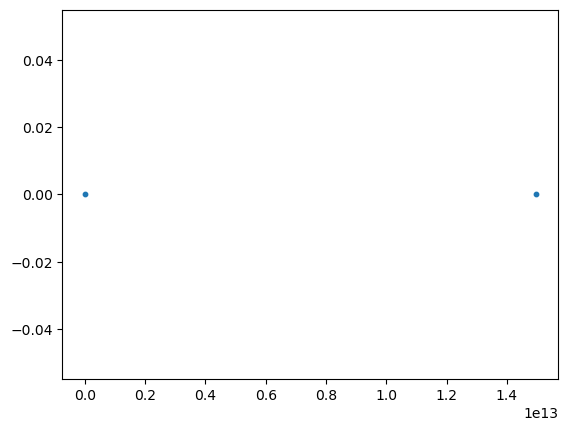

In [43]:
pos = initial_SolarSystem().get_positions()
plt.scatter(pos[:, 0], pos[:, 1], s = 10)

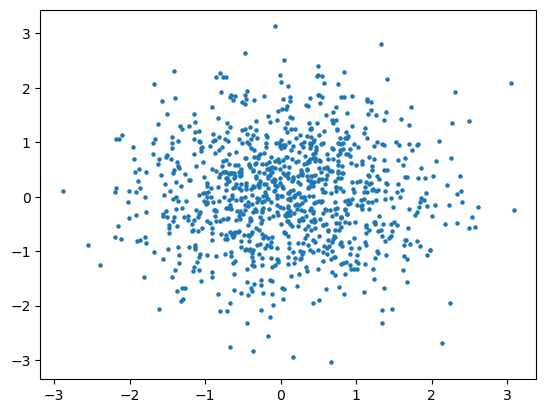

In [44]:
pos = initial_NormalDistribution().get_positions()
plt.scatter(pos[:, 0], pos[:, 1], s = 5)

## Use `@property` 

We could actually use python's `@property` to replace the getter and setter in `Particles` class.\

For example,

In [45]:
class foo:
    def __init__(self):
        self._x = 0
        return
    def get_x(self):
        return self._x
    def set_x(self, value):
        self._x = value
        return

In [46]:
a = foo()
a.x = 3
value = a.x
print(value)

3


The above code is equivalent to

In [47]:
class foo2:
    def __init__(self):
        self._x = 0
        return
    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, value):
        self._x = value
        return

In [48]:
a = foo2()
a.x = 3
value = a.x
print(value)

3
